In [ ]:
import requests
import re

file_id = "6b62d6dd-bb6f-4f39-9041-992c47b875f3"

data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id)

response = requests.get(data_endpt, headers = {"Content-Type": "application/json"})

# The file name can be found in the header within the Content-Disposition key.
response_head_cd = response.headers["Content-Disposition"]

file_name = re.findall("filename=(.+)", response_head_cd)[0]

with open(file_name, "wb") as output_file:
    output_file.write(response.content)

In [ ]:
import requests
import re

file_id = "1300bf72-ead0-4c03-b140-fca26302b43c"

data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id)

response = requests.get(data_endpt, headers = {"Content-Type": "application/json"})

# The file name can be found in the header within the Content-Disposition key.
response_head_cd = response.headers["Content-Disposition"]

file_name = re.findall("filename=(.+)", response_head_cd)[0]

with open(file_name, "wb") as output_file:
    output_file.write(response.content)

In [ ]:
import csv

tsv_file_path = '/content/2f21d781-2df5-4de1-a595-a61507cfe610.rna_seq.augmented_star_gene_counts.tsv'
csv_file_path = 'output.csv'

with open(tsv_file_path, 'r', newline='', encoding='utf-8') as tsv_file:
    tsv_reader = csv.reader(tsv_file, delimiter='\t')

    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)

        for row in tsv_reader:
            csv_writer.writerow(row)

print("Conversion completed.")


Conversion completed.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
csv_file_path = '/content/drive/MyDrive/ML_Dataset/output.csv'
data = pd.read_csv(csv_file_path)

# Encode categorical columns using LabelEncoder
categorical_columns = ['gene_id', 'gene_name', 'gene_type']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data into features (X) and target (y)
X = data.drop(['tpm_unstranded'], axis=1)  # Exclude the target column
y = data['tpm_unstranded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train various regression models

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print(f"Linear Regression Mean Squared Error: {linear_mse}")
print(f"Linear Regression R-squared: {linear_r2}")

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)
print(f"Decision Tree Regression Mean Squared Error: {tree_mse}")
print(f"Decision Tree Regression R-squared: {tree_r2}")

# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)
print(f"Random Forest Regression Mean Squared Error: {forest_mse}")
print(f"Random Forest Regression R-squared: {forest_r2}")

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print(f"Support Vector Regression Mean Squared Error: {svr_mse}")
print(f"Support Vector Regression R-squared: {svr_r2}")


Linear Regression Mean Squared Error: 2.160430126844638e-09
Linear Regression R-squared: 0.9999999999999758
Decision Tree Regression Mean Squared Error: 243.07472544613927
Decision Tree Regression R-squared: 0.9972790932584932
Random Forest Regression Mean Squared Error: 242.1586037412467
Random Forest Regression R-squared: 0.997289348054496
Support Vector Regression Mean Squared Error: 87209.59147340599
Support Vector Regression R-squared: 0.02380156995540539


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting Regression Mean Squared Error: {gb_mse}")
print(f"Gradient Boosting Regression R-squared: {gb_r2}")

Gradient Boosting Regression Mean Squared Error: 230.7140424607979
Gradient Boosting Regression R-squared: 0.9974174550960011


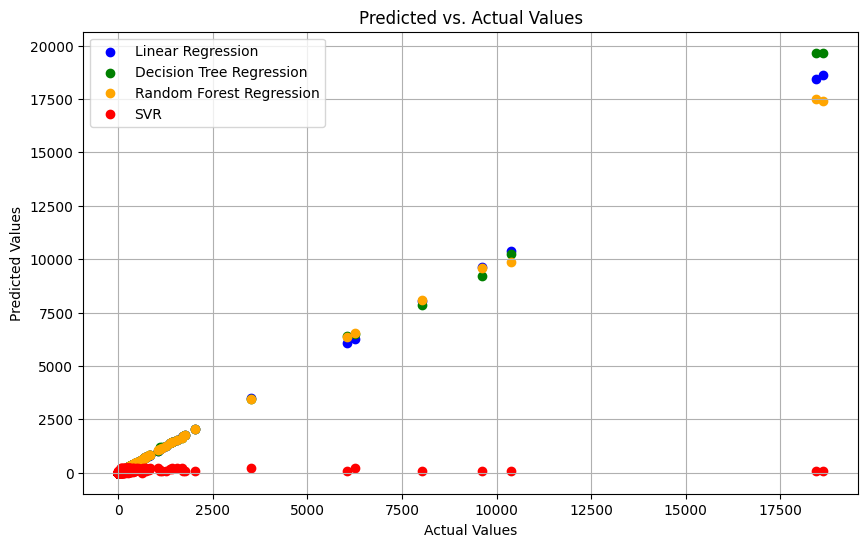

In [ ]:
import matplotlib.pyplot as plt

# Visualize Predicted vs. Actual Values using Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, tree_pred, color='green', label='Decision Tree Regression')
plt.scatter(y_test, forest_pred, color='orange', label='Random Forest Regression')
plt.scatter(y_test, svr_pred, color='red', label='SVR')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()
